In [31]:
! pip install -U scikit-learn
! pip install matplotlib
! pip install pandas
! pip install numpy
! pip install scikit-plot
! pip install scipy==1.11.4

In [32]:
import pickle
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scikitplot as skplt

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn import tree

## Load in Data

### TF-IDF

In [34]:
with open('/Users/shreyanakum/Documents/CS178/CS-178-Project/DATA/tfidf_data.pkl', 'rb') as f:
    tfidf_data = pickle.load(f)

X_train_tfidf = tfidf_data['X_train']
X_test_tfidf = tfidf_data['X_test']
y_train_tfidf = tfidf_data['y_train']
y_test_tfidf = tfidf_data['y_test']
vectorizer_tfidf = tfidf_data['vectorizer']

### Count Vectorizer

In [35]:
with open('/Users/shreyanakum/Documents/CS178/CS-178-Project/DATA/count_data.pkl', 'rb') as f:
    count_data = pickle.load(f)

X_train_count = count_data['X_train']
X_test_count = count_data['X_test']
y_train_count = count_data['y_train']
y_test_count = count_data['y_test']
vectorizer_count = count_data['vectorizer']

In [36]:
classes = ['toxic', 'severe_toxic', 'insult', 'threat', 'obscene', 'identity_hate']

## Max Depths

In [37]:
max_depths = [3, 10, 15, 20, 30, 50]

### TIFIDF

In [38]:
acc_tfidfs = []
preds_tfidfs = {3: None, 10: None, 15: None, 20: None, 50: None}
for max_depth in [3, 10, 15, 20, 30, 50]:
    dt_tfidf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_tfidf.fit(tfidf_data['X_train'], tfidf_data['y_train'])
    pred_tfidf = dt_tfidf.predict(tfidf_data['X_test'])
    preds_tfidfs[max_depth] = pred_tfidf
    acc_tfidf = accuracy_score(tfidf_data['y_test'], pred_tfidf)
    acc_tfidfs.append(acc_tfidf)

### Count Vectorization

In [39]:
acc_counts = []
preds_counts = {3: None, 10: None, 15: None, 20: None, 50: None}
for max_depth in [3, 10, 15, 20, 30, 50]:
    dt_count = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_count.fit(count_data['X_train'], count_data['y_train'])
    pred_count = dt_tfidf.predict(count_data['X_test'])
    preds_counts[max_depth] = pred_count
    acc_count = accuracy_score(count_data['y_test'], pred_count)
    acc_counts.append(acc_count)

#### Visualization

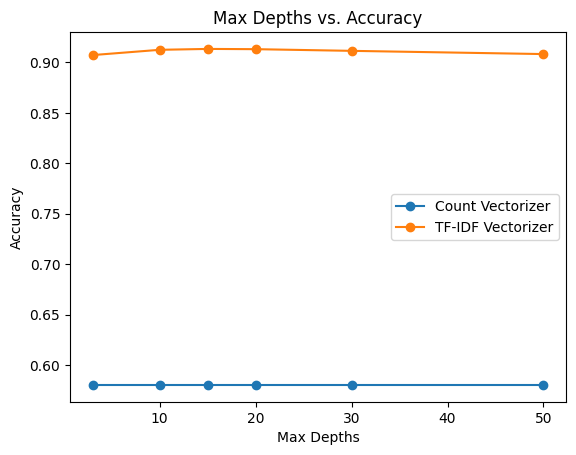

In [40]:
plt.plot([3, 10, 15, 20, 30, 50], acc_counts, marker='o', label='Count Vectorizer')
plt.plot([3, 10, 15, 20, 30, 50], acc_tfidfs, marker='o', label='TF-IDF Vectorizer')
plt.title("Max Depths vs. Accuracy")
plt.xlabel("Max Depths")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
best_depth_tfidf = max_depths[np.argmax(acc_tfidfs)]
best_depth_count = max_depths[np.argmax(acc_counts)]
print(f"Best depth Counts: {max_depths[np.argmax(acc_counts)]}")
print(f"Best depth TFIDFS: {max_depths[np.argmax(acc_tfidfs)]}")

Best depth: 3
Best depth: 15


In [47]:
print(classification_report(tfidf_data['y_test'], preds_tfidfs[best_depth_tfidf]))

              precision    recall  f1-score   support

           0       0.92      0.45      0.60      3056
           1       0.43      0.10      0.16       321
           2       0.86      0.63      0.73      1715
           3       0.13      0.04      0.06        74
           4       0.71      0.49      0.58      1614
           5       0.30      0.07      0.12       294

   micro avg       0.82      0.47      0.60      7074
   macro avg       0.56      0.30      0.38      7074
weighted avg       0.80      0.47      0.58      7074
 samples avg       0.04      0.04      0.04      7074



/Users/shreyanakum/Documents/CS178/CS-178-Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shreyanakum/Documents/CS178/CS-178-Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shreyanakum/Documents/CS178/CS-178-Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to con

In [48]:
print(classification_report(count_data['y_test'], preds_counts[best_depth_count]))

              precision    recall  f1-score   support

           0       0.18      0.78      0.30      3056
           1       0.05      0.42      0.09       321
           2       0.15      0.75      0.25      1715
           3       0.00      0.09      0.00        74
           4       0.13      0.58      0.21      1614
           5       0.04      0.20      0.07       294

   micro avg       0.13      0.68      0.22      7074
   macro avg       0.09      0.47      0.15      7074
weighted avg       0.15      0.68      0.25      7074
 samples avg       0.06      0.07      0.06      7074



/Users/shreyanakum/Documents/CS178/CS-178-Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shreyanakum/Documents/CS178/CS-178-Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shreyanakum/Documents/CS178/CS-178-Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to con

## Min Leaf Samples

In [56]:
min_leaf_samples = [1, 2, 4, 8, 10, 20, 40]

### TFIDF

In [57]:
acc_tfidfs = []
preds_tfidfs = {1: None, 2: None, 4: None, 8: None, 10: None, 20: None, 40: None}
for min_leaf in min_leaf_samples:
    dt_tfidf = DecisionTreeClassifier(max_depth=15, random_state=42, min_samples_leaf=min_leaf)
    dt_tfidf.fit(tfidf_data['X_train'], tfidf_data['y_train'])
    pred_tfidf = dt_tfidf.predict(tfidf_data['X_test'])
    preds_tfidfs[min_leaf] = pred_tfidf
    acc_tfidf = accuracy_score(tfidf_data['y_test'], pred_tfidf)
    acc_tfidfs.append(acc_tfidf)

### Count Vectorization

In [58]:
acc_counts = []
preds_counts = {1: None, 2: None, 4: None, 8: None, 10: None, 20: None, 40: None}
for min_leaf in min_leaf_samples:
    dt_count = DecisionTreeClassifier(max_depth=3, random_state=42, min_samples_leaf=min_leaf)
    dt_count.fit(count_data['X_train'], count_data['y_train'])
    pred_count = dt_count.predict(count_data['X_test'])
    preds_counts[min_leaf] = pred_count
    acc_count = accuracy_score(count_data['y_test'], pred_count)
    acc_counts.append(acc_count)

### Visualization

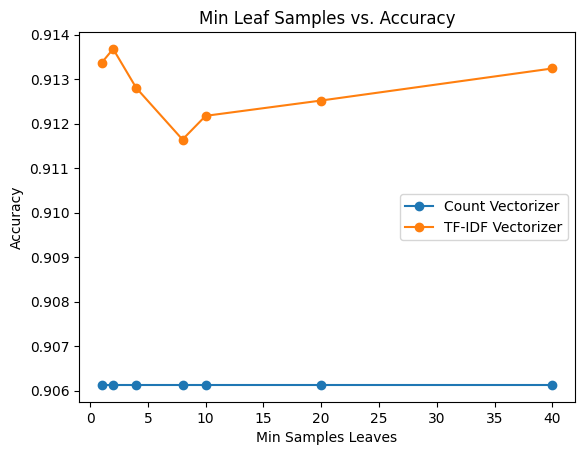

In [59]:
plt.plot(min_leaf_samples, acc_counts, marker='o', label='Count Vectorizer')
plt.plot(min_leaf_samples, acc_tfidfs, marker='o', label='TF-IDF Vectorizer')
plt.title("Min Leaf Samples vs. Accuracy")
plt.xlabel("Min Samples Leaves")
plt.ylabel("Accuracy")
plt.legend()

In [60]:
best_leaf_tfidf = min_leaf_samples[np.argmax(acc_tfidfs)]
best_leafcount = min_leaf_samples[np.argmax(acc_counts)]
print(f"Best Min Leaf TFIDF: {best_leaf_tfidf}")
print(f"Best Min Leaf Count Vectorization: {best_leafcount}")

Best Min Leaf TFIDF: 2
Best Min Leaf Count Vectorization: 1


In [61]:
print(f"Count Vectorization:")
print(classification_report(count_data['y_test'], preds_counts[best_leaf_tfidf]))
print(f"TFIDF:")
print(classification_report(tfidf_data['y_test'], preds_tfidfs[best_leafcount]))

Count Vectorization:
              precision    recall  f1-score   support

           0       0.92      0.28      0.43      3056
           1       0.41      0.10      0.16       321
           2       0.86      0.47      0.61      1715
           3       0.00      0.00      0.00        74
           4       0.73      0.30      0.43      1614
           5       0.00      0.00      0.00       294

   micro avg       0.83      0.31      0.45      7074
   macro avg       0.49      0.19      0.27      7074
weighted avg       0.79      0.31      0.44      7074
 samples avg       0.02      0.02      0.02      7074

TFIDF:
              precision    recall  f1-score   support

           0       0.92      0.45      0.60      3056
           1       0.43      0.10      0.16       321
           2       0.86      0.63      0.73      1715
           3       0.13      0.04      0.06        74
           4       0.71      0.49      0.58      1614
           5       0.30      0.07      0.12       

/Users/shreyanakum/Documents/CS178/CS-178-Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shreyanakum/Documents/CS178/CS-178-Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shreyanakum/Documents/CS178/CS-178-Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control th

## Criterion

In [77]:
crits = ['gini', 'entropy', 'log_loss']

### TFIDF

In [78]:
acc_tfidfs = []
preds_tfidfs = {'gini': None, 'entropy': None, 'log_loss': None}
for crit in crits:
    dt_tfidf = DecisionTreeClassifier(max_depth=15, random_state=42, min_samples_leaf=2, criterion=crit)
    dt_tfidf.fit(tfidf_data['X_train'], tfidf_data['y_train'])
    pred_tfidf = dt_tfidf.predict(tfidf_data['X_test'])
    preds_tfidfs[crit] = pred_tfidf
    acc_tfidf = accuracy_score(tfidf_data['y_test'], pred_tfidf)
    acc_tfidfs.append(acc_tfidf)

### Count Vec

In [79]:
acc_counts = []
preds_counts = {'gini': None, 'entropy': None, 'log_loss': None}
for crit in crits:
    dt_count = DecisionTreeClassifier(max_depth=3, random_state=42, min_samples_leaf=40, criterion=crit)
    dt_count.fit(count_data['X_train'], count_data['y_train'])
    pred_count = dt_count.predict(count_data['X_test'])
    preds_counts[crit] = pred_count
    acc_count = accuracy_score(count_data['y_test'], pred_count)
    acc_counts.append(acc_count)

### Visualization

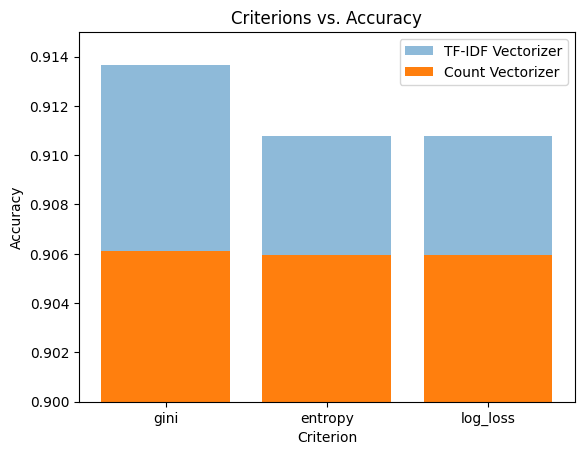

In [95]:
plt.bar(crits, acc_tfidfs, label='TF-IDF Vectorizer', alpha=0.5)
plt.bar(crits, acc_counts, label='Count Vectorizer', alpha=1.0)
plt.title("Criterions vs. Accuracy")
plt.xlabel("Criterion")
plt.ylabel("Accuracy")
plt.ylim(0.9,0.915)
plt.legend()

In [81]:
best_crit_tfidf = crits[np.argmax(acc_tfidfs)]
best_crit_count = crits[np.argmax(acc_counts)]
print(f"Best Crit TFIDF: {best_crit_tfidf}")
print(f"Best Crit Count Vectorization: {best_crit_count}")

Best Crit TFIDF: gini
Best Crit Count Vectorization: gini


In [82]:
print(f"Count Vectorization:")
print(classification_report(count_data['y_test'], preds_counts[best_crit_tfidf]))
print(f"TFIDF:")
print(classification_report(tfidf_data['y_test'], preds_tfidfs[best_crit_count]))

Count Vectorization:
              precision    recall  f1-score   support

           0       0.92      0.28      0.43      3056
           1       0.41      0.10      0.16       321
           2       0.86      0.47      0.61      1715
           3       0.00      0.00      0.00        74
           4       0.73      0.30      0.43      1614
           5       0.00      0.00      0.00       294

   micro avg       0.83      0.31      0.45      7074
   macro avg       0.49      0.19      0.27      7074
weighted avg       0.79      0.31      0.44      7074
 samples avg       0.02      0.02      0.02      7074

TFIDF:
              precision    recall  f1-score   support

           0       0.93      0.45      0.60      3056
           1       0.48      0.10      0.16       321
           2       0.87      0.63      0.73      1715
           3       0.16      0.04      0.06        74
           4       0.71      0.49      0.58      1614
           5       0.32      0.06      0.11       

/Users/shreyanakum/Documents/CS178/CS-178-Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shreyanakum/Documents/CS178/CS-178-Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shreyanakum/Documents/CS178/CS-178-Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control th